In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import keras
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
gpu=tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0],True)

In [3]:
# path = 'train19'
    
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('train19',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test19',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 19552 images belonging to 19 classes.
Found 19552 images belonging to 19 classes.


In [5]:
cnn = tf.keras.models.Sequential()
print("Building Neural Network.....")
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))
# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation='tanh'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128))
cnn.add(tf.keras.layers.Dense(units=128,activation=None))
cnn.add(tf.keras.layers.Dense(units=19, activation='softmax'))
print("Training cnn.....")
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Building Neural Network.....
Training cnn.....


In [6]:
model = cnn.fit(training_set, validation_data = test_set, batch_size=70, epochs = 200)

Epoch 1/200
306/306 [==============================] - 175s 546ms/step - loss: 2.0581 - accuracy: 0.3262 - val_loss: 1.6079 - val_accuracy: 0.4791
Epoch 2/200
306/306 [==============================] - 129s 423ms/step - loss: 1.5322 - accuracy: 0.5030 - val_loss: 1.4396 - val_accuracy: 0.5396
Epoch 3/200
306/306 [==============================] - 130s 425ms/step - loss: 1.3128 - accuracy: 0.5760 - val_loss: 1.3922 - val_accuracy: 0.5617
Epoch 4/200
306/306 [==============================] - 129s 421ms/step - loss: 1.1690 - accuracy: 0.6257 - val_loss: 1.1079 - val_accuracy: 0.6447
Epoch 5/200
306/306 [==============================] - 131s 430ms/step - loss: 1.0519 - accuracy: 0.6621 - val_loss: 0.9999 - val_accuracy: 0.6845
Epoch 6/200
306/306 [==============================] - 127s 416ms/step - loss: 0.9759 - accuracy: 0.6883 - val_loss: 0.8645 - val_accuracy: 0.7259
Epoch 7/200
306/306 [==============================] - 127s 415ms/step - loss: 0.8889 - accuracy: 0.7176 - val_loss: 0

KeyboardInterrupt: 

In [ ]:
# path = 'modelbuild.h5'
# cnn.save(path)
# print("Weight Created")

In [ ]:
# model=keras.models.load_model('modelbuild19_30e.h5')

In [8]:
ans=cnn.predict(test_set)

306/306 [==============================] - 29s 94ms/step


In [9]:
classIndex=np.argmax(ans,axis=1)
print(classIndex)

def getName9(classNo):
    if   classNo == 0: return 'Apple'
    elif classNo == 1: return 'Avocado'
    elif classNo == 2: return 'Banana'
    elif classNo == 3: return 'Cherry'
    elif classNo == 4: return 'Kiwi'
    elif classNo == 5: return 'Orange'
    elif classNo == 6: return 'Pineapple'
    elif classNo == 7: return 'Strawberries'
    elif classNo == 8: return 'Watermelon'
    else: pass
    
def getName19(classNo):
    if   classNo == 0: return 'Apple'
    elif classNo == 1: return 'Avocado'
    elif classNo == 2: return 'Banana'
    elif classNo == 3: return 'Bell Pepper'
    elif classNo == 4: return 'Bitter Gourd'
    elif classNo == 5: return 'Blueberry'
    elif classNo == 6: return 'Cherry'
    elif classNo == 7: return 'Coconut'
    elif classNo == 8: return 'Dragonfruit'
    elif classNo == 9: return 'Durian'
    elif classNo == 10: return 'Eggplant'
    elif classNo == 11: return 'Grape'
    elif classNo == 12: return 'Kiwi'
    elif classNo == 13: return 'Lime'
    elif classNo == 14: return 'Mangosteen'
    elif classNo == 15: return 'Orange'
    elif classNo == 16: return 'Peanut'
    elif classNo == 17: return 'Tomato'
    elif classNo == 18: return 'Watermelon'
    else: pass
print(getName19(classIndex[1]))

[ 9 10  8 ...  4 11 18]
Eggplant


In [ ]:
# ans.argmax()

In [10]:
y=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])

In [ ]:
# y.shape

In [11]:
y_pred=np.round(ans)
# print(y_pred)

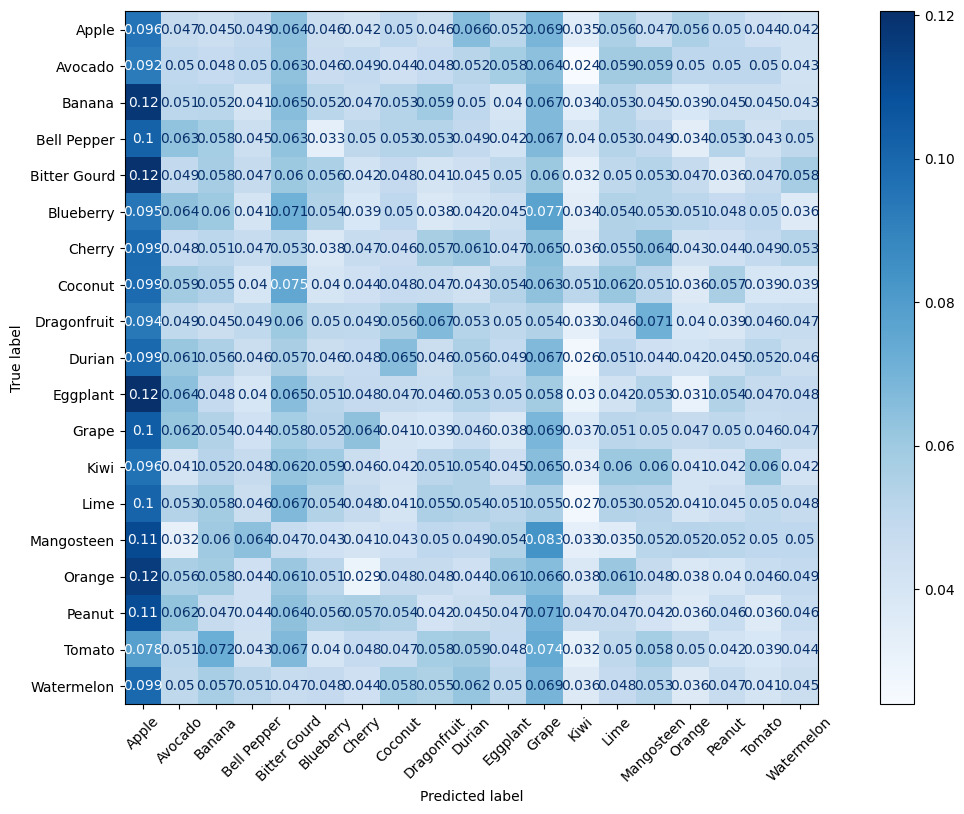

In [12]:

labels9 = ['Apple','Avocado','Banana','Cherry','Kiwi','Orange','Pineapple','Strawberries','Watermelon']
labels19 = [
    'Apple',
    'Avocado',
    'Banana',
    'Bell Pepper',
    'Bitter Gourd',
    'Blueberry',
    'Cherry',
    'Coconut',
    'Dragonfruit',
    'Durian',
    'Eggplant',
    'Grape',
    'Kiwi',
    'Lime',
    'Mangosteen',
    'Orange',
    'Peanut',
    'Tomato',
    'Watermelon'
    ]
cm=confusion_matrix(y_true=y.argmax(axis=1),y_pred=y_pred.argmax(axis=1),normalize='true')
disp=ConfusionMatrixDisplay(cm,display_labels=labels19)
fig, ax = plt.subplots(figsize=(16,9))
disp.plot(ax=ax,xticks_rotation=45,cmap=plt.cm.Blues)
plt.savefig('cm19c30e5_temp.png')
plt.show()

In [13]:
np.diag(cm)

array([0.09559435, 0.04961506, 0.05163511, 0.045     , 0.06035283,
       0.05389222, 0.04685942, 0.04785156, 0.06666667, 0.05555556,
       0.05039526, 0.06873185, 0.03366337, 0.05346535, 0.05158371,
       0.03775883, 0.0462963 , 0.039     , 0.04518072])

In [ ]:
print(training_set.class_indices)